# Plot the loss function output and validation value over epochs
Alpha => Kana with Attention

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

RE_LOSS = re.compile(r'Epoch \d+ Loss (\d*\.\d*)')
RE_VALIDATION = re.compile(r'Validation Accuracy (\d*\.\d*)')

def get_loss_validation_from_file(file_name):

    losses = []
    validations = []
    
    with open(file_name) as f:
        for line in f:
            line = line.strip()
            match_loss= RE_LOSS.match(line)
            if match_loss:
                losses.append(float(match_loss.group(1)))
            match_valid= RE_VALIDATION.match(line)
            if match_valid:
                validations.append(float(match_valid.group(1)))

    x = np.linspace(0,len(losses)-1,len(losses))
    y_losses = np.array(losses)
    y_validations = np.array(validations)

    return x, y_losses, y_validations  


In [7]:
INPUT_FILE_TEMPLATE = "./training_output/alpha_to_kana_{}/log.txt"
FIG_OUTPUT = 'figs/learning_curve_alpha_to_kana.png'


x_16, L_16, V_16 = get_loss_validation_from_file(INPUT_FILE_TEMPLATE.format("16"))
x_32, L_32, V_32 = get_loss_validation_from_file(INPUT_FILE_TEMPLATE.format("32"))
x_64, L_64, V_64 = get_loss_validation_from_file(INPUT_FILE_TEMPLATE.format("64"))
x_128, L_128, V_128 = get_loss_validation_from_file(INPUT_FILE_TEMPLATE.format("128"))
x_256, L_256, V_256 = get_loss_validation_from_file(INPUT_FILE_TEMPLATE.format("256"))

# The following values are calculated from the full validation set of approx 10,000 entries
x_64_full = [5,10, 20, 40, 60, 80, 100]
V_64_full = [0.8762, 0.7587, 0.6972, 0.6517, 0.6396 ,0.6389, 0.6363]

x_128_full = [5, 10,20,40,60,80,100]
V_128_full = [0.7062, 0.6392, 0.6146, 0.6266, 0.6276, 0.6417, 0.6430]

x_256_full = [5, 10, 20, 30, 40]
V_256_full = [0.6421, 0.5980, 0.6143, 0.6344, 0.6493]

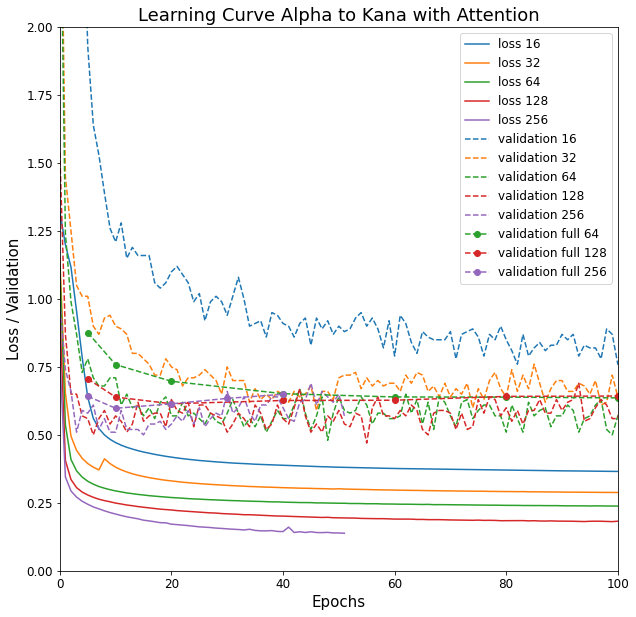

In [9]:
color_16 = 'tab:blue'
color_32 = 'tab:orange'
color_64 = 'tab:green'
color_128 = 'tab:red'
color_256 = 'tab:purple'
color_512 = 'tab:brown'

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(x_16, L_16, label='loss 16', color=color_16)
ax.plot(x_32, L_32, label='loss 32', color=color_32)
ax.plot(x_64, L_64, label='loss 64', color=color_64)
ax.plot(x_128, L_128, label='loss 128', color=color_128)
ax.plot(x_256, L_256, label='loss 256', color=color_256)

ax.plot(x_16, V_16, '--', label='validation 16', color=color_16)
ax.plot(x_32, V_32, '--', label='validation 32', color=color_32)
ax.plot(x_64, V_64, '--', label='validation 64', color=color_64)
ax.plot(x_128, V_128, '--', label='validation 128', color=color_128)
ax.plot(x_256, V_256, '--', label='validation 256', color=color_256)

ax.plot(x_64_full, V_64_full, '--', marker='o', label='validation full 64', color=color_64)
ax.plot(x_128_full, V_128_full, '--', marker='o', label='validation full 128', color=color_128)
ax.plot(x_256_full, V_256_full, '--', marker='o', label='validation full 256', color=color_256)

ax.set_ylim([0,2.0])
ax.set_xlim([0,100])
ax.set_xlabel('Epochs', fontsize=15)
ax.set_ylabel('Loss / Validation', fontsize=15)
ax.set_title('Learning Curve Alpha to Kana with Attention', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(prop={'size':12})
plt.savefig(FIG_OUTPUT)
plt.show()